<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data pre-processing</a></span><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Group-indicators-into-risk-factors" data-toc-modified-id="Group-indicators-into-risk-factors-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Group indicators into risk factors</a></span></li><li><span><a href="#Explore-Indicator-availability-over-the-years" data-toc-modified-id="Explore-Indicator-availability-over-the-years-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Explore Indicator availability over the years</a></span></li><li><span><a href="#Explore-data-disagregation" data-toc-modified-id="Explore-data-disagregation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Explore data disagregation</a></span></li><li><span><a href="#Detect-outliers" data-toc-modified-id="Detect-outliers-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Detect outliers</a></span></li><li><span><a href="#Compute-zscores" data-toc-modified-id="Compute-zscores-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Compute zscores</a></span><ul class="toc-item"><li><span><a href="#Metabolic-Risk-Factor" data-toc-modified-id="Metabolic-Risk-Factor-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Metabolic Risk Factor</a></span></li><li><span><a href="#Behavorial-Risk-Factor" data-toc-modified-id="Behavorial-Risk-Factor-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Behavorial Risk Factor</a></span></li><li><span><a href="#NCD-Risk-Factor" data-toc-modified-id="NCD-Risk-Factor-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>NCD Risk Factor</a></span></li></ul></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Export-to-csv" data-toc-modified-id="Export-to-csv-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Export to csv</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Visualization</a></span></li></ul></li></ul></div>

## Data pre-processing

In [1]:
#!pip install plotly==4.8.1
#!pip install chart-studio==1.0.0

### Import data

In [2]:
import pandas as pd
#df = pd.read_excel('ncd_indicators_v2.xlsx')
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9ec483c0831342be812265e6eb2abb7e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ZZsA6bB5ZwKyJf0kALEATqM2XoTO6GdQRSz6k-7mIOBI',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_9ec483c0831342be812265e6eb2abb7e.get_object(Bucket='vulnerabilityindex-donotdelete-pr-aqv5sngmk3zknz',Key='input.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
df  = pd.read_csv(body)

df.head()

,Unnamed: 0,country,data,indicator,indicator_group,source,year
0,1,São Tome and Principe,3172.942179,Dietary risks DALYs (Disability-Adjusted Life ...,Behavioral,41.0,2017
1,2,São Tome and Principe,264.877507,Low physical activity DALYs (Disability-Adjust...,Behavioral,41.0,2017
2,3,São Tome and Principe,6787.533688,Chronic respiratory diseases Prevalence Rate,NCD,41.0,2017
3,4,São Tome and Principe,6673.369512,Cardiovascular diseases Prevalence Rate,NCD,41.0,2017
4,5,São Tome and Principe,529.069554,Neoplasms Prevalence Rate,NCD,41.0,2017


In [3]:
print('There are {} rows in the imported dataset.'.format(df.shape[0]))

There are 2219 rows in the imported dataset.


In [4]:
print('There are {} unique indicators in the imported dataset in total.'.format(df['indicator'].nunique()))

There are 12 unique indicators in the imported dataset in total.


In [5]:
print('Count of null values per column: ')
df.isnull().sum()

Count of null values per column: 


Unnamed: 0           0
country              0
data                 0
indicator            0
indicator_group      0
source             189
year                 0
dtype: int64

In [6]:
#dropi = df[df['country'] =='TERRITORY'].index
#df.drop(dropi, inplace=True)

#dropi = df[df['data']=='-'].index
#df.drop(dropi, inplace=True)

In [7]:
df['year'] = df['year'].astype('int64')
df['data'] = df['data'].astype('float64')
df['data'] = df['data'].round(2)
print('Colums imported and their datatypes')
df.dtypes

Colums imported and their datatypes


Unnamed: 0           int64
country             object
data               float64
indicator           object
indicator_group     object
source             float64
year                 int64
dtype: object

In [8]:
df.head()

,Unnamed: 0,country,data,indicator,indicator_group,source,year
0,1,São Tome and Principe,3172.94,Dietary risks DALYs (Disability-Adjusted Life ...,Behavioral,41.0,2017
1,2,São Tome and Principe,264.88,Low physical activity DALYs (Disability-Adjust...,Behavioral,41.0,2017
2,3,São Tome and Principe,6787.53,Chronic respiratory diseases Prevalence Rate,NCD,41.0,2017
3,4,São Tome and Principe,6673.37,Cardiovascular diseases Prevalence Rate,NCD,41.0,2017
4,5,São Tome and Principe,529.07,Neoplasms Prevalence Rate,NCD,41.0,2017


### Indicators vs risk factor grouping

In [9]:
print('Risk factors considered: ', df['indicator_group'].unique())

Risk factors considered:  ['Behavioral' 'NCD' 'Metabolic']


### Explore Indicator availability over the years 

In [10]:
print('The dataset has data in total {} unique countries.'.format( df['country'].nunique() ))

The dataset has data in total 193 unique countries.


In [11]:
#df.groupby(['indicator_group','indicator','year'])['country'].nunique()

In [12]:
print('This is how the indicators data points per country are broken down: ')
#df.groupby(['indicator_group','indicator','year'])['country'].nunique()#.reset_index(name='count')

x = df.groupby(['indicator_group','year'])['country'].nunique().reset_index(name='count')

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])


# x positions of bars
x1 = x[x['indicator_group']=='Behavioral']['year']
x2 = x[x['indicator_group']=='NCD']['year']
x3 = x[(x['indicator_group']=='Metabolic') & (x['year']>=2000)]['year']


# y positions of bars

y1 = x[x['indicator_group']=='Behavioral']['count']
y2 = x[x['indicator_group']=='NCD']['count']
y3 = x[(x['indicator_group']=='Metabolic') &  (x['year']>=2000)]['count']



p1 = ax.bar(x1,y1,label='Behavioral',align='center',color = 'lightblue')
p2 = ax.bar(x2,y2,label='NCD',align='center',color = 'darkred')
p3 = ax.bar(x3,y3,label='Metabolic',align='center',color = 'pink')

ax.set_ylabel('Nb of country data points')
ax.set_xlabel('Year')
ax.set_title('Countries Data Points Available per Risk Group and Year')
plt.xticks(np.arange(2000, 2020, step=1))
ax.legend()
plt.show()

This is how the indicators data points per country are broken down: 


<Figure size 1200x600 with 1 Axes>

### Explore data correlation

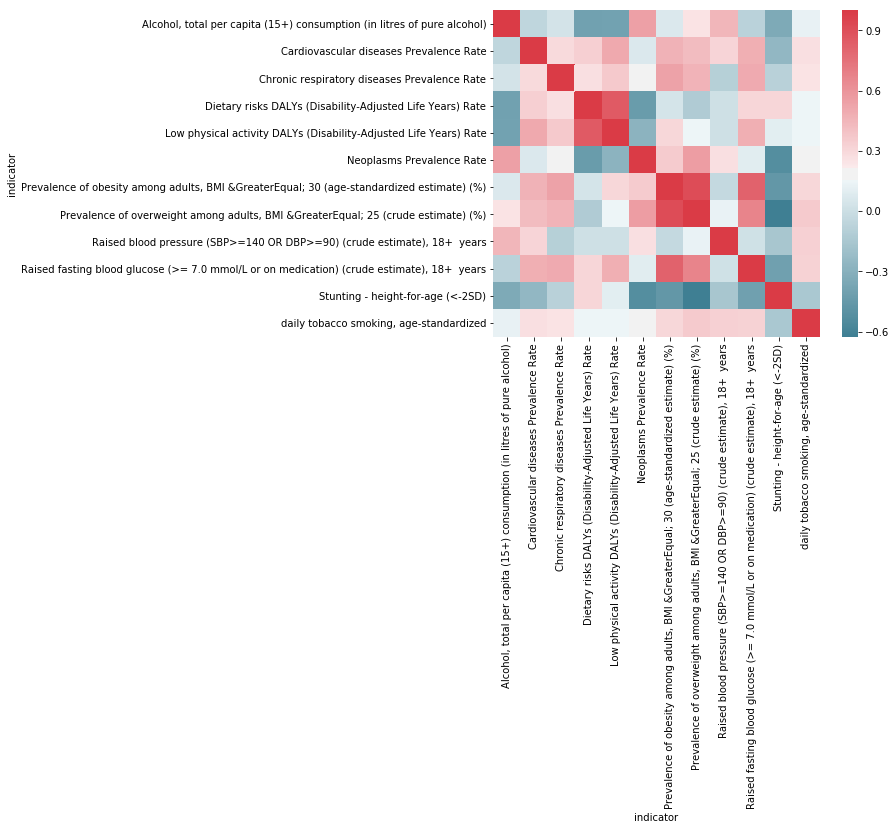

In [13]:
pivot_ind  = df.pivot(index='country', columns='indicator', values='data')


import matplotlib.pyplot as pl
import seaborn as sns
import numpy as np

corr = pivot_ind.corr()

f, ax = pl.subplots(figsize=(8, 6))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [14]:
corr.style.background_gradient(cmap=sns.diverging_palette(220, 10, as_cmap=True)).set_precision(2)

indicator,"Alcohol, total per capita (15+) consumption (in litres of pure alcohol)",Cardiovascular diseases Prevalence Rate,Chronic respiratory diseases Prevalence Rate,Dietary risks DALYs (Disability-Adjusted Life Years) Rate,Low physical activity DALYs (Disability-Adjusted Life Years) Rate,Neoplasms Prevalence Rate,"Prevalence of obesity among adults, BMI ≥ 30 (age-standardized estimate) (%)","Prevalence of overweight among adults, BMI ≥ 25 (crude estimate) (%)","Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years","Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years",Stunting - height-for-age (<-2SD),"daily tobacco smoking, age-standardized"
indicator,,,,,,,,,,,,
"Alcohol, total per capita (15+) consumption (in litres of pure alcohol)",1,-0.049,0.03,-0.4,-0.39,0.55,0.071,0.25,0.45,-0.075,-0.35,0.13
Cardiovascular diseases Prevalence Rate,-0.049,1,0.29,0.34,0.51,0.069,0.47,0.43,0.32,0.48,-0.25,0.27
Chronic respiratory diseases Prevalence Rate,0.03,0.29,1,0.28,0.37,0.21,0.54,0.47,-0.095,0.5,-0.082,0.26
Dietary risks DALYs (Disability-Adjusted Life Years) Rate,-0.4,0.34,0.28,1,0.86,-0.43,0.04,-0.12,0.01,0.31,0.31,0.15
Low physical activity DALYs (Disability-Adjusted Life Years) Rate,-0.39,0.51,0.37,0.86,1,-0.28,0.3,0.15,0.013,0.48,0.1,0.15
Neoplasms Prevalence Rate,0.55,0.069,0.21,-0.43,-0.28,1,0.36,0.56,0.28,0.097,-0.53,0.2
"Prevalence of obesity among adults, BMI ≥ 30 (age-standardized estimate) (%)",0.071,0.47,0.54,0.04,0.3,0.36,1,0.92,-0.031,0.82,-0.46,0.31
"Prevalence of overweight among adults, BMI ≥ 25 (crude estimate) (%)",0.25,0.43,0.47,-0.12,0.15,0.56,0.92,1,0.14,0.67,-0.62,0.36
"Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years",0.45,0.32,-0.095,0.01,0.013,0.28,-0.031,0.14,1,0.02,-0.16,0.34


### Compute zscores and detect outliers

#### Metabolic Risk Factor

In [15]:
df_meta = df[(df['indicator_group']=='Metabolic')]
#df_meta.head()

In [16]:
#df_meta['country'].nunique()

In [17]:
#len(df_meta)

In [18]:
#df_meta['indicator'].unique()

In [19]:
a = df_meta[df_meta['indicator']=='Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years' ] 
b = df_meta[df_meta['indicator']=='Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years' ] 
c = df_meta[df_meta['indicator']=='Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)' ] 
#d = df_meta[df_meta['indicator']=='Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)' ] 
#e = df_meta[df_meta['indicator']=='Stunting - height-for-age (<-2SD)' ] 

common_countries = \
    set.intersection(set(a['country']), set(b['country']), set(c['country']))#,set(d['country'])) #,set(e['country']))

In [20]:
df_meta = pd.concat([
    a[a['country'].isin(common_countries)],
    b[b['country'].isin(common_countries)],
    c[c['country'].isin(common_countries)]#,
   # d[d['country'].isin(common_countries)]#,
   # e[e['country'].isin(common_countries)]
    
]).sort_values(by='country')

In [21]:
print('Data available complete for all indicators considered is for {} countries'. format(len(common_countries)))

Data available complete for all indicators considered is for 191 countries


In [22]:
#df_meta.shape

In [23]:
print('Outlier Detection')

Outlier Detection


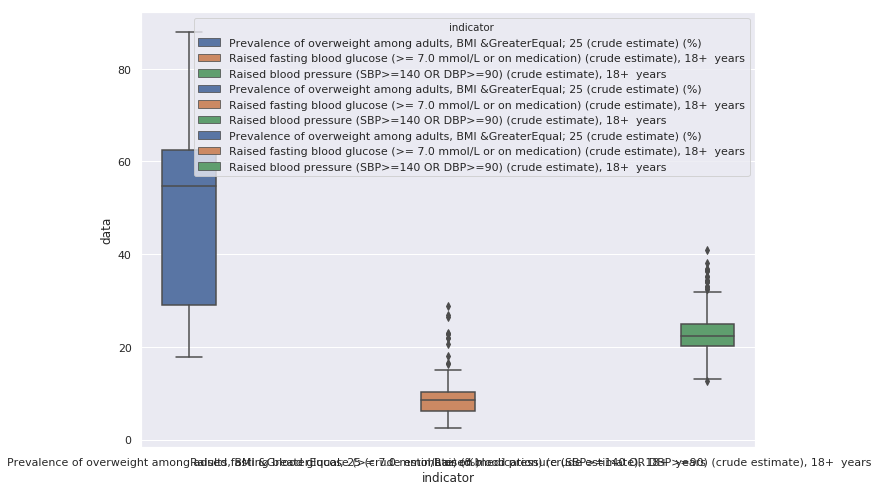

In [24]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})    
irange = df_meta['indicator'].unique()

for i in irange:
    sns.boxplot(x='indicator', y = df_meta[df_meta['indicator']==i]['data'],data=df_meta,hue="indicator")
#ax = sns.boxplot(x="Trial", y="value", hue="Number", data=mdf)  # RUN PLOT   

In [25]:
data = df_meta[df_meta['indicator']=='Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years']

Q1 = np.percentile(data['data'] , 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['data'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['data'], 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim) 


outlier =[] 
out = pd.DataFrame()
ind = []
val = []
for x,c,i in zip( data['data'], data['country'],data['indicator']): 
    if ((x> up_lim) or (x<low_lim)): 
        outlier.append(c) 
        ind.append(i)
        val.append(x)

print('cumulative count of outlier in the dataset is', len(outlier))

Q1 25 percentile of the given data is,  20.1
Q1 50 percentile of the given data is,  22.3
Q1 75 percentile of the given data is,  24.95
Interquartile range is 4.849999999999998
low_limit is 12.825000000000005
up_limit is 32.224999999999994
cumulative count of outlier in the dataset is 18


In [26]:
data = df_meta[df_meta['indicator']=='Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years']

Q1 = np.percentile(data['data'] , 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['data'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['data'], 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim) 

for x,c,i in zip( data['data'], data['country'],data['indicator']): 
    if ((x> up_lim) or (x<low_lim)): 
        outlier.append(c) 
        ind.append(i)
        val.append(x)     

print('cumulative outlier in the dataset is', len(val))

Q1 25 percentile of the given data is,  6.2
Q1 50 percentile of the given data is,  8.5
Q1 75 percentile of the given data is,  10.2
Interquartile range is 3.999999999999999
low_limit is 0.20000000000000195
up_limit is 16.199999999999996
cumulative outlier in the dataset is 30


In [27]:
#out.shape

In [28]:
print('Pivot Data')

Pivot Data


In [29]:
df_metarisk=pd.DataFrame()
irange = df_meta['indicator'].unique()
df_meta.sort_values(['indicator', 'country'], ascending=True, inplace = True)

for i in irange:
    print(i)
    pivot = df_meta[df_meta['indicator']==i].pivot(index='country', columns='indicator', values='data')
    #print(pivot)
    pivot.reset_index(inplace=True)
    pivot.columns =['country', i]
    df_metarisk['country']=pivot['country']
    df_metarisk = pd.concat([df_metarisk, pivot[i]], axis=1)
    #print(df_metarisk)
    


df_metarisk.head()



Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)
Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years
Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years


,country,"Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)","Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years","Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years"
0,Afghanistan,19.7,8.4,23.0
1,Albania,58.7,8.3,31.6
2,Algeria,60.7,10.5,21.7
3,Andorra,68.1,9.1,24.5
4,Angola,23.9,5.6,22.3


In [30]:
df_metarisk=df_metarisk.iloc[:,0:4]

In [31]:
df_metarisk.shape

(191, 4)

In [32]:
""" cols = list(df_metarisk.columns)
cols.remove('country')
cols
for col in cols:
    col_zscore = 'zscore_' + col
    df_metarisk[col_zscore] = (df_metarisk[col] - df_metarisk[col].mean())/df_metarisk[col].std(ddof=0)
df_metarisk"""

" cols = list(df_metarisk.columns)\ncols.remove('country')\ncols\nfor col in cols:\n    col_zscore = 'zscore_' + col\n    df_metarisk[col_zscore] = (df_metarisk[col] - df_metarisk[col].mean())/df_metarisk[col].std(ddof=0)\ndf_metarisk"

In [33]:
print('Compute zscores')

Compute zscores


In [34]:
from scipy.stats import zscore

meta_zscore= df_metarisk.iloc[:,1:5]
meta_zscore = meta_zscore.apply(zscore)
#meta_zscore.head()

In [35]:
meta_zscore['country']= df_metarisk.iloc[:,0]

In [36]:
meta_zscore.head()

,"Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)","Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years","Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years",country
0,-1.578069,-0.166132,-0.041868,Afghanistan
1,0.555603,-0.188749,1.647851,Albania
2,0.665022,0.308819,-0.297290,Algeria
3,1.069872,-0.007815,0.252851,Andorra
4,-1.348289,-0.799401,-0.179403,Angola


In [37]:
len(meta_zscore)

191

In [38]:
print('Verify no nulls' )
meta_zscore.isnull().sum()

Verify no nulls


Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)             0
Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years    0
Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years                      0
country                                                                                       0
dtype: int64

In [39]:
print('Unpivot Data')

Unpivot Data


In [40]:
meta_zscore.reset_index(inplace=True)
result_meta = pd.melt(meta_zscore, id_vars=['country'], var_name=['indicator'],
        value_vars=['Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years', 
                                                      'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)',
                                                     'Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years'])
                                                     #'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)'])
result_meta['indicator_group']='Metabolic'
result_meta.head()

,country,indicator,value,indicator_group
0,Afghanistan,Raised blood pressure (SBP>=140 OR DBP>=90) (c...,-0.041868,Metabolic
1,Albania,Raised blood pressure (SBP>=140 OR DBP>=90) (c...,1.647851,Metabolic
2,Algeria,Raised blood pressure (SBP>=140 OR DBP>=90) (c...,-0.297290,Metabolic
3,Andorra,Raised blood pressure (SBP>=140 OR DBP>=90) (c...,0.252851,Metabolic
4,Angola,Raised blood pressure (SBP>=140 OR DBP>=90) (c...,-0.179403,Metabolic


#### Behavorial Risk Factor

In [41]:
df_behav = df[(df['indicator_group']=='Behavioral')] 

In [42]:
#df_behav['country'].nunique()

In [43]:
#df_behav['indicator'].unique()

In [44]:
a = df_behav[df_behav['indicator']=='Alcohol, total per capita (15+) consumption (in litres of pure alcohol)'] 
b = df_behav[df_behav['indicator']=='Dietary risks DALYs (Disability-Adjusted Life Years) Rate' ] 
c = df_behav[df_behav['indicator']=='Low physical activity DALYs (Disability-Adjusted Life Years) Rate' ] 
d = df_behav[df_behav['indicator']== 'daily tobacco smoking, age-standardized' ] 



common_countries_behav = \
    set.intersection( set(a['country']), set(b['country']), set(c['country']),set(d['country']))


df_behav = pd.concat([
    a[a['country'].isin(common_countries_behav)],
    b[b['country'].isin(common_countries_behav)],
   c[c['country'].isin(common_countries_behav)],
    d[d['country'].isin(common_countries_behav)]
    
]).sort_values(by='country')

In [45]:
print('Data available complete for all indicators considered is for {} countries'. format(len(common_countries_behav)))

Data available complete for all indicators considered is for 172 countries


In [46]:
print('Outlier Detection')

Outlier Detection


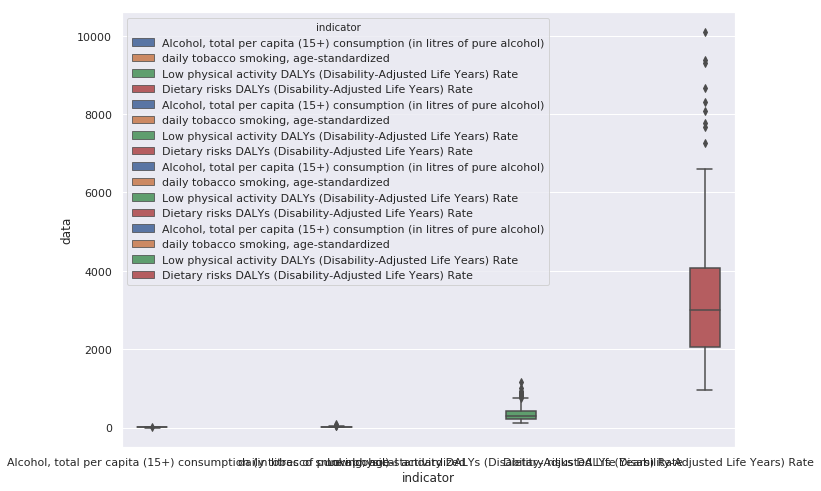

In [47]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})    
irange = df_behav['indicator'].unique()
for i in irange:
    sns.boxplot(x='indicator', y = df_behav[df_behav['indicator']==i]['data'],data=df_behav,hue='indicator')
#ax = sns.boxplot(x="Trial", y="value", hue="Number", data=mdf)  # RUN PLOT 

In [48]:
print('Dietary risks DALYs (Disability-Adjusted Life Years) Rate: ')
data = df_behav[df_behav['indicator']=='Dietary risks DALYs (Disability-Adjusted Life Years) Rate']

Q1 = np.percentile(data['data'] , 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['data'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['data'], 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim) 

for x,c,i in zip( data['data'], data['country'],data['indicator']): 
    if ((x> up_lim) or (x<low_lim)): 
        outlier.append(c) 
        ind.append(i)
        val.append(x)     

print('cumulative count outlier in the dataset is', len(val))

Dietary risks DALYs (Disability-Adjusted Life Years) Rate: 
Q1 25 percentile of the given data is,  2046.3400000000001
Q1 50 percentile of the given data is,  3002.935
Q1 75 percentile of the given data is,  4109.105
Interquartile range is 2062.7649999999994
low_limit is -1047.807499999999
up_limit is 7203.252499999999
cumulative count outlier in the dataset is 39


In [49]:
print('Low physical activity DALYs (Disability-Adjusted Life Years) Rate')
data = df_behav[df_behav['indicator']== 'Low physical activity DALYs (Disability-Adjusted Life Years) Rate']

Q1 = np.percentile(data['data'] , 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['data'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['data'], 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim) 

for x,c,i in zip( data['data'], data['country'],data['indicator']): 
    if ((x> up_lim) or (x<low_lim)): 
        outlier.append(c) 
        ind.append(i)
        val.append(x)     

print('cumulative outlier in the dataset is', len(val))

Low physical activity DALYs (Disability-Adjusted Life Years) Rate
Q1 25 percentile of the given data is,  209.02499999999998
Q1 50 percentile of the given data is,  293.205
Q1 75 percentile of the given data is,  435.395
Interquartile range is 226.37
low_limit is -130.53000000000003
up_limit is 774.95
cumulative outlier in the dataset is 50


In [50]:
print('Daily tobacco smoking, age-standardized')
data = df_behav[df_behav['indicator']== 'daily tobacco smoking, age-standardized']

Q1 = np.percentile(data['data'] , 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['data'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['data'], 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim) 

for x,c,i in zip( data['data'], data['country'],data['indicator']): 
    if ((x> up_lim) or (x<low_lim)): 
        outlier.append(c) 
        ind.append(i)
        val.append(x)     

print('cumulative outlier in the dataset is', len(val))

Daily tobacco smoking, age-standardized
Q1 25 percentile of the given data is,  9.0
Q1 50 percentile of the given data is,  15.0
Q1 75 percentile of the given data is,  22.0
Interquartile range is 13.0
low_limit is -10.5
up_limit is 41.5
cumulative outlier in the dataset is 53


In [51]:
data = df_behav[df_behav['indicator']== 'Alcohol, total per capita (15+) consumption (in litres of pure alcohol)']

Q1 = np.percentile(data['data'] , 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['data'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['data'], 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim) 

for x,c,i in zip( data['data'], data['country'],data['indicator']): 
    if ((x> up_lim) or (x<low_lim)): 
        outlier.append(c) 
        ind.append(i)
        val.append(x)     

print('cumulative outlier in the dataset is', len(val))

Q1 25 percentile of the given data is,  2.25
Q1 50 percentile of the given data is,  5.75
Q1 75 percentile of the given data is,  9.55
Interquartile range is 7.300000000000001
low_limit is -8.700000000000001
up_limit is 20.5
cumulative outlier in the dataset is 53


In [52]:
df_behrisk=pd.DataFrame()
irange = df_behav['indicator'].unique()
df_behav.sort_values(['indicator', 'country'], ascending=True, inplace = True)



for i in irange:
    pivot = df_behav[df_behav['indicator']==i].pivot(index='country', columns='indicator', values='data')
    pivot.reset_index(inplace=True)
    pivot.columns =['country', i]
    df_behrisk['country']=pivot['country']
    #df_behrisk [i] = pivot[i]
    df_behrisk = pd.concat([df_behrisk, pivot[i]], axis=1)
    


    

df_behrisk.head()


,country,"Alcohol, total per capita (15+) consumption (in litres of pure alcohol)","daily tobacco smoking, age-standardized",Low physical activity DALYs (Disability-Adjusted Life Years) Rate,Dietary risks DALYs (Disability-Adjusted Life Years) Rate
0,Afghanistan,0.2,6.0,1173.26,9368.06
1,Albania,7.2,23.0,249.53,2771.23
2,Algeria,0.9,12.0,471.06,2963.28
3,Andorra,11.0,28.0,155.55,1142.57
4,Angola,6.9,6.0,305.94,3158.81


In [53]:
print('calculate zscore')

calculate zscore


In [54]:
from scipy.stats import zscore

behav_zscore= df_behrisk.iloc[:,1:5]
behav_zscore = behav_zscore.apply(zscore)
behav_zscore.head()

,"Alcohol, total per capita (15+) consumption (in litres of pure alcohol)","daily tobacco smoking, age-standardized",Low physical activity DALYs (Disability-Adjusted Life Years) Rate,Dietary risks DALYs (Disability-Adjusted Life Years) Rate
0,-1.399529,-1.049107,4.011284,3.348285
1,0.261911,0.696818,-0.501429,-0.317161
2,-1.233385,-0.432899,0.580815,-0.210451
3,1.163836,1.210325,-0.960551,-1.222106
4,0.190707,-1.049107,-0.225848,-0.101807


In [55]:
behav_zscore.shape

(172, 4)

In [56]:
print('unpivot data')

unpivot data


In [57]:
behav_zscore['country'] = df_behrisk.iloc[:,0]
behav_zscore.reset_index(inplace=True)
result_beha = pd.melt(behav_zscore, id_vars=['country'], var_name=['indicator'],
        value_vars=['Dietary risks DALYs (Disability-Adjusted Life Years) Rate', 
                                                     'Alcohol, total per capita (15+) consumption (in litres of pure alcohol)',
                                                     'Low physical activity DALYs (Disability-Adjusted Life Years) Rate',
                                                    'daily tobacco smoking, age-standardized'])
result_beha['indicator_group']='Behavioral'
result_beha.head()

,country,indicator,value,indicator_group
0,Afghanistan,Dietary risks DALYs (Disability-Adjusted Life ...,3.348285,Behavioral
1,Albania,Dietary risks DALYs (Disability-Adjusted Life ...,-0.317161,Behavioral
2,Algeria,Dietary risks DALYs (Disability-Adjusted Life ...,-0.210451,Behavioral
3,Andorra,Dietary risks DALYs (Disability-Adjusted Life ...,-1.222106,Behavioral
4,Angola,Dietary risks DALYs (Disability-Adjusted Life ...,-0.101807,Behavioral


#### NCD Risk Factor

In [58]:
df_ncd = df[(df['indicator_group']=='NCD')]
#df_ncd.head()

In [59]:
#df_ncd.isnull().sum()

In [60]:
#df_ncd['country'].nunique()

In [61]:
#df_ncd['indicator'].unique()

In [62]:
a = df_ncd[df_ncd['indicator']=='Chronic respiratory diseases Prevalence Rate' ] 
b = df_ncd[df_ncd['indicator']=='Cardiovascular diseases Prevalence Rate'  ] 
c = df_ncd[df_ncd['indicator']=='Neoplasms Prevalence Rate' ] 


common_countries_ncd = \
    set.intersection(set(a['country']), set(b['country']), set(c['country']))


df_ncd = pd.concat([
    a[a['country'].isin(common_countries_ncd)],
    b[b['country'].isin(common_countries_ncd)],
    c[c['country'].isin(common_countries_ncd)]
    
]).sort_values(by='country')

In [63]:
print('Data available complete for all indicators considered is for {} countries'. format(len(common_countries_ncd)))

Data available complete for all indicators considered is for 187 countries


In [64]:
#df_ncd.isnull().sum()

In [65]:
print('outlier detection')

outlier detection


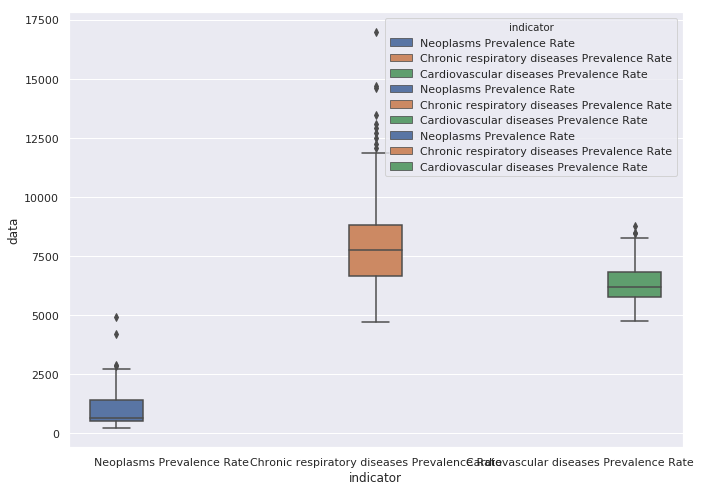

In [66]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})    
irange = df_ncd['indicator'].unique()
for i in irange:
    sns.boxplot(x='indicator', y = df_ncd[df_ncd['indicator']==i]['data'],data=df_ncd, hue='indicator')
#ax = sns.boxplot(x="Trial", y="value", hue="Number", data=mdf)  # RUN PLOT 

In [67]:
print('Chronic respiratory diseases Prevalence Rate')

data = df_ncd[df_ncd['indicator']=='Chronic respiratory diseases Prevalence Rate']



Q1 = np.percentile(data['data'] , 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['data'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['data'], 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim) 

for x,c,i in zip( data['data'], data['country'],data['indicator']): 
    if ((x> up_lim) or (x<low_lim)): 
        outlier.append(c) 
        ind.append(i)
        val.append(x)     

print('cumulative count outlier in the dataset is', len(val))

Chronic respiratory diseases Prevalence Rate
Q1 25 percentile of the given data is,  6645.299999999999
Q1 50 percentile of the given data is,  7750.04
Q1 75 percentile of the given data is,  8801.52
Interquartile range is 2156.220000000001
low_limit is 3410.9699999999975
up_limit is 12035.850000000002
cumulative count outlier in the dataset is 63


In [68]:
print('Cardiovascular diseases Prevalence Rate')

data = df_ncd[df_ncd['indicator']=='Cardiovascular diseases Prevalence Rate']



Q1 = np.percentile(data['data'] , 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['data'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['data'], 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim) 

for x,c,i in zip( data['data'], data['country'],data['indicator']): 
    if ((x> up_lim) or (x<low_lim)): 
        outlier.append(c) 
        ind.append(i)
        val.append(x)     

print('cumulative count outlier in the dataset is', len(val))

Cardiovascular diseases Prevalence Rate
Q1 25 percentile of the given data is,  5757.695
Q1 50 percentile of the given data is,  6205.78
Q1 75 percentile of the given data is,  6806.485000000001
Interquartile range is 1048.7900000000009
low_limit is 4184.509999999998
up_limit is 8379.670000000002
cumulative count outlier in the dataset is 66


In [69]:
print('Neoplasms Prevalence Rate')
data = df_ncd[df_ncd['indicator']=='Neoplasms Prevalence Rate']



Q1 = np.percentile(data['data'] , 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['data'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['data'], 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim) 

for x,c,i in zip( data['data'], data['country'],data['indicator']): 
    if ((x> up_lim) or (x<low_lim)): 
        outlier.append(c) 
        ind.append(i)
        val.append(x)     

print('cumulative count outlier in the dataset is', len(val))

Neoplasms Prevalence Rate
Q1 25 percentile of the given data is,  507.34
Q1 50 percentile of the given data is,  673.16
Q1 75 percentile of the given data is,  1395.0749999999998
Interquartile range is 887.7349999999999
low_limit is -824.2625
up_limit is 2726.6775
cumulative count outlier in the dataset is 70


In [70]:
out = pd.DataFrame(list(zip(outlier,ind,val))) 
out.to_csv('outliers.csv')

In [71]:
print('There are {} outliers detected.'.format(out.shape[0]))

There are 70 outliers detected.


In [72]:
import pandas as pd
df=pd.DataFrame()

import base64  
from IPython.display import HTML

def create_download_link( df, title = "Download all outliers", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


create_download_link(out)

In [73]:
df_ncdrisk=pd.DataFrame()
irange = df_ncd['indicator'].unique()
df_ncd.sort_values(['indicator', 'country'], ascending=True, inplace = True)

for i in irange:
    print(i)
    pivot = df_ncd[df_ncd['indicator']==i].pivot(index='country', columns='indicator', values='data')
    pivot.reset_index(inplace=True)
    pivot.columns =['country', i]
    df_ncdrisk['country']=pivot['country']
    #df_ncd [i] = pivot[i]
    df_ncdrisk = pd.concat([df_ncdrisk, pivot[i]], axis=1)
    
    
#df_ncdrisk.head()

Neoplasms Prevalence Rate
Chronic respiratory diseases Prevalence Rate
Cardiovascular diseases Prevalence Rate


In [74]:
print('Compute zscore for NCD')

Compute zscore for NCD


In [75]:
ncd_zscore= df_ncdrisk.iloc[:,1:5]
ncd_zscore = ncd_zscore.apply(zscore)
ncd_zscore.head()

,Neoplasms Prevalence Rate,Chronic respiratory diseases Prevalence Rate,Cardiovascular diseases Prevalence Rate
0,-0.672595,1.179129,2.209483
1,0.108444,-0.772627,2.500656
2,-0.631944,0.436743,0.997727
3,1.597424,0.629782,-0.153941
4,-0.805905,-0.147722,-0.920173


In [76]:
ncd_zscore.shape

(187, 3)

In [77]:
print('unpivot data')

unpivot data


In [78]:
ncd_zscore['country'] = df_ncdrisk.iloc[:,0]
ncd_zscore.reset_index(inplace=True)
result_ncd = pd.melt(ncd_zscore, id_vars=['country'], var_name=['indicator'],
        value_vars=['Neoplasms Prevalence Rate', 
                                                      'Chronic respiratory diseases Prevalence Rate',
                                                     'Cardiovascular diseases Prevalence Rate'
                                                ])
result_ncd['indicator_group']='NCD'
result_ncd.head()

,country,indicator,value,indicator_group
0,Afghanistan,Neoplasms Prevalence Rate,-0.672595,NCD
1,Albania,Neoplasms Prevalence Rate,0.108444,NCD
2,Algeria,Neoplasms Prevalence Rate,-0.631944,NCD
3,Andorra,Neoplasms Prevalence Rate,1.597424,NCD
4,Angola,Neoplasms Prevalence Rate,-0.805905,NCD


In [79]:
result = result_ncd.append([result_beha, result_meta])
result['value']=result['value'].round(2)
#result.head()

## Results

In [80]:
result['value'] = result['value'].astype('float64')
print('snapshot of the results: ')
result.head(10)

snapshot of the results: 


,country,indicator,value,indicator_group
0,Afghanistan,Neoplasms Prevalence Rate,-0.67,NCD
1,Albania,Neoplasms Prevalence Rate,0.11,NCD
2,Algeria,Neoplasms Prevalence Rate,-0.63,NCD
3,Andorra,Neoplasms Prevalence Rate,1.60,NCD
4,Angola,Neoplasms Prevalence Rate,-0.81,NCD
5,Antigua and Barbuda,Neoplasms Prevalence Rate,0.23,NCD
6,Argentina,Neoplasms Prevalence Rate,0.09,NCD
7,Armenia,Neoplasms Prevalence Rate,-0.08,NCD
8,Australia,Neoplasms Prevalence Rate,2.29,NCD
9,Austria,Neoplasms Prevalence Rate,1.38,NCD


In [81]:
print('Number of data points per risk group')
result['indicator_group'].value_counts()

Number of data points per risk group


Behavioral    688
Metabolic     573
NCD           561
Name: indicator_group, dtype: int64

In [82]:
print('The dimensions of the unpivoted result file are {}'.format(result.shape))

The dimensions of the unpivoted result file are (1822, 4)


In [83]:
result.to_csv('res.csv')

In [84]:
#print(np.where(result['value'] > 3.0))

In [85]:
#i = np.where(result['value'] > 3.0)[0]
#result.iloc[i,:]

### Export to csv

In [86]:
result.to_csv('res.csv')

import pandas as pd
df=pd.DataFrame()

import base64  
from IPython.display import HTML

def create_download_link( df, title = "Download all the results", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


create_download_link(result)

### Visualization

In [87]:
pivot = result.pivot(index='country', columns='indicator', values='value')
#pivot.reset_index()
pivot = pivot.reset_index(drop=False)
#pivot.head()

In [88]:
print('Pivoted results has the following dimensions {}'.format(pivot.shape))

Pivoted results has the following dimensions (193, 11)


In [89]:
print ('Gaps in data by count {}'.format( pivot.isnull().sum()))

Gaps in data by count indicator
country                                                                                        0
Alcohol, total per capita (15+) consumption (in litres of pure alcohol)                       21
Cardiovascular diseases Prevalence Rate                                                        6
Chronic respiratory diseases Prevalence Rate                                                   6
Dietary risks DALYs (Disability-Adjusted Life Years) Rate                                     21
Low physical activity DALYs (Disability-Adjusted Life Years) Rate                             21
Neoplasms Prevalence Rate                                                                      6
Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)              2
Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years                       2
Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years     

In [90]:
missing = pivot[pivot.isnull().any(axis=1)]
missing.to_csv('missing.csv')

import pandas as pd
df=pd.DataFrame()

import base64  
from IPython.display import HTML

def create_download_link( df, title = "Download all gaps missing in data", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


create_download_link(missing)

In [91]:
pivot = pivot.dropna() 

In [92]:
#pivot.isnull().sum()

In [93]:
pivot.shape

(172, 11)

In [94]:
pivot['score'] = pivot.mean(axis=1).round(2)

In [95]:
#pivot['Low physical activity DALYs (Disability-Adjusted Life Years) Rate']=pivot['Low physical activity DALYs (Disability-Adjusted Life Years) Rate']*-1

In [96]:
score_min = pivot['score'].min()
score_max= pivot['score'].max()

In [97]:
print('Normalized the scores 0-100')

Normalized the scores 0-100


In [98]:
pivot['score_norm'] = (((pivot['score'] - score_min) / (score_max - score_min))*100).round(2)
pivot['rank']= pivot['score_norm'].rank(ascending=False)

In [99]:
#pivot.head()
#pivot['score_norm'].min()

In [100]:
pivot.to_csv('ranks.csv')
pivot.sort_values(by=['rank'])
import pandas as pd
df=pd.DataFrame()

import base64  
from IPython.display import HTML

def create_download_link( df, title = "Download Ranks in CSV", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


create_download_link(pivot)

In [101]:
#!pip install geopy

In [102]:
# use geocoder to fetch the lat and lng of cities with locations that do not have a Trader Joe's
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

lat=[]
lng=[]


for c in pivot['country']:
    address = c
    #print(c)
    
    geolocator = Nominatim(user_agent="explorer",timeout=4)
    #RateLimiter allows to perform bulk operations while gracefully handling error responses and adding delays when needed.
    #to avoid: urlopen error timed
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=4)
    location = geolocator.geocode(address)
    lat.append(location.latitude)
    lng.append(location.longitude)
    
    
pivot['Latitude']=lat
pivot['Longitude']=lng

In [103]:
#import plotly
#plotly.__version__

#!pip install plotly==4.8.1
#!pip install chart-studio==1.0.0

In [105]:
import plotly.express as px


import chart_studio.plotly as py
#import chart_studio.plotly as py

from chart_studio.tools import set_config_file
set_config_file(plotly_domain="https://plotly.com", plotly_api_domain="https://api.plotly.com")

chart_studio.tools.set_credentials_file(username='gse19', api_key='BC3tpGMkqCm1Y8pIEK7e')



#plotly.tools.set_credentials_file(username='gse19', api_key='BC3tpGMkqCm1Y8pIEK7e')

from plotly import graph_objs as go
#import plotly.graph_objects as go


pivot['text'] = pivot['country'] + " <br>Score: " + pivot["score_norm"].astype(str) + "<br> Rank: " +  pivot["rank"].astype(str)
fig = go.Figure(data = go.Scattergeo(
    lon = pivot["Longitude"],
    lat = pivot["Latitude"],
    text = pivot["text"],
    mode = "markers",
    marker = dict(
        size = 10,
        opacity = 0.8,
        reversescale = True,
        autocolorscale = False,
        symbol = 'circle',
        line = dict(
            width = 1,
            color = 'rgba(102, 102, 102)'
        ),
        cmin = pivot["score_norm"].min(),
        color = pivot["score_norm"],
        cmax = pivot["score_norm"].max()
        ,colorbar_title = "Vulnerability Index"
    )
))




fig.update_layout(
    title = "Vulnerability Index for Countries Around the World <b> Hover over the circles",
    geo = dict(
        scope = "world",
        showland = True,
    ),
    width=1000, height=600
    
    
)

#fig.write_html('first_figure.html', auto_open=True)
#fig.show()

py.iplot(fig, filename = 'Vulnerability Index', auto_open=True)

In [ ]:
#! pip uninstall plotly --yes
#! conda uninstall plotly
# conda install -c plotly plotly
#! pip uninstall plotly